# Cryptocurrency Financial Econometrics with Machine Learning


### Bitcoin Price Prediction Using LSTM & Flask Dashboard

This notebook presents an in-depth and comprehensive methodology for developing a Bitcoin price prediction system, leveraging the power of Long Short-Term Memory (LSTM) neural networks, which are a sophisticated variant of recurrent neural networks (RNNs) specifically engineered to excel at modeling and forecasting time series data, and integrating this with a Flask web application to provide an interactive and user-friendly visualization dashboard. The entire project is meticulously organized into several key phases, each designed to build upon the previous one for a cohesive end-to-end solution.

The first phase, **Data Acquisition and Preparation**, involves retrieving historical Bitcoin price data from a locally stored CSV file named `BitcoinHistoricalData.csv`, followed by a thorough process of cleaning and preprocessing the dataset, which includes tasks such as addressing missing values, converting string-formatted numerical data into floating-point numbers for computational use, and applying feature scaling techniques to normalize the data, thereby ensuring optimal performance during LSTM training. 

In the second phase, **LSTM Model Development**, a robust LSTM model is carefully constructed using the TensorFlow framework, featuring a multi-layered architecture that incorporates dropout regularization layers to mitigate the risk of overfitting, with the design tailored to effectively capture and learn the intricate temporal dependencies inherent in Bitcoin price movements, enabling precise and reliable forecasting capabilities.

The third phase, **Model Training and Evaluation**, entails training the LSTM model on a designated subset of the historical data and subsequently assessing its predictive accuracy on a separate test set, utilizing performance metrics such as Mean Squared Error (MSE) to quantify the model’s effectiveness, while also including detailed steps to transform the raw time series data into appropriately structured sequences that align with the input requirements of the LSTM architecture.

For the fourth phase, **Flask Dashboard Implementation**, the notebook lays the groundwork for creating a Flask-based web application intended to serve as an interactive interface, where users could visualize historical Bitcoin prices, model predictions, and evaluation metrics in an accessible and engaging format, although the actual implementation of this dashboard is not fully realized within the provided code and remains an implied future enhancement.

Finally, the fifth phase, **Deployment (Optional)**, suggests the possibility of deploying the completed system to a cloud platform such as Heroku or AWS to make it widely accessible to users over the internet, though this step is presented as an optional extension and is not executed within the scope of the current notebook.

Overall, this notebook delivers a rich collection of code snippets, exploratory data analysis, and visualization examples, serving as a practical guide for users interested in constructing a Bitcoin price prediction system, while equipping them with the foundational knowledge and skills necessary to further enhance, customize, and potentially deploy such a model using cutting-edge machine learning tools and technologies.


#### Cell 1: Installing Required Library
#### Explanation: This cell installs the 'pandas-datareader' library, which is used to fetch financial data from various online sources.

In [2]:
!pip install pandas-datareader

#### Cell 2: Importing Core Libraries
#### Explanation: These libraries are essential for data manipulation (pandas, numpy) and fetching financial data (pandas_datareader).

In [3]:
import pandas as pd  # For data handling and manipulation
import numpy as np  # For numerical operations
import pandas_datareader as data  # For fetching financial data from APIs

##### Cell 3: Setting Up Visualization
#### Explanation: Matplotlib is imported for plotting, and a specific style is applied for better visual appeal. '%matplotlib inline' ensures plots display within the notebook.

In [7]:
import matplotlib.pyplot as plt  # For creating plots and visualizations
plt.style.use('fivethirtyeight')  # Applies a clean, modern plotting style
%matplotlib inline  # Displays plots directly in the notebook

UsageError: unrecognized arguments: # Displays plots directly in the notebook


### Importing dataset

#### Cell 4: Checking File Existence
#### Explanation: This verifies if the Bitcoin historical data CSV file exists at the specified path before loading it.

In [8]:
import os  # For file system operations
file_path = r"E:\COLLEGEPROJECT\College Project\BitcoinHistoricalData.csv"  # Path to the CSV file
print("File exists:", os.path.exists(file_path))  # Prints True if file exists, False otherwise

File exists: True


##### Cell 5: Loading the Dataset
#### Explanation: Loads the Bitcoin historical data from the CSV file into a pandas DataFrame for analysis.

In [9]:
dataset = pd.read_csv(r"E:\COLLEGEPROJECT\College Project\BitcoinHistoricalData.csv")  # Reads CSV into a DataFrame

#### Cell 6: Displaying First Rows
#### Explanation: Shows the first 5 rows of the dataset to inspect its structure (e.g., columns like Date, Price, Open, High, Low, etc.).

In [10]:
dataset.head()  # Displays the top 5 rows of the dataset

Date      Price       Open       High        Low    Vol. Change %
0  02/02/2025   99,304.3  100,647.1  101,451.0   99,081.8  61.33K   -1.34%
1  02/01/2025  100,648.0  102,421.3  102,770.8  100,293.5  47.48K   -1.73%
2  01/31/2025  102,424.2  104,726.9  105,876.3  101,576.0  82.79K   -2.20%
3  01/30/2025  104,726.9  103,723.0  106,409.1  103,388.4  74.84K    0.97%
4  01/29/2025  103,722.0  101,342.1  104,760.0  101,340.6  74.38K    2.34%

#### Cell 7: Displaying Last Rows
#### Explanation: Shows the last 5 rows of the dataset to examine the most recent entries, allowing inspection of the dataset’s end (e.g., columns like Date, Price, Open, High, Low, etc.).

In [11]:
dataset.tail()

Date Price  Open  High   Low    Vol. Change %
4471  11/06/2012  10.9  10.8  10.9  10.7  27.00K    1.40%
4472  11/05/2012  10.8  10.8  10.9  10.6  21.78K   -0.46%
4473  11/04/2012  10.8  10.6  10.9  10.5  16.75K    1.50%
4474  11/03/2012  10.6  10.5  10.6  10.4  16.73K    1.62%
4475  11/02/2012  10.5  10.6  10.8  10.3  24.49K   -0.95%

#### Cell 8: Checking Dataset Dimensions
#### Explanation: Retrieves the number of rows and columns in the dataset (e.g., a tuple like (1000, 6)), providing a quick overview of its size and structure.

In [12]:
dataset.shape

(4476, 7)

#### Cell 9: Summarizing Dataset Information
#### Explanation: Displays a summary of the dataset, including column names, data types (e.g., object, float), and non-null counts, helping to assess its composition and readiness for analysis.

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476 entries, 0 to 4475
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4476 non-null   object
 1   Price     4476 non-null   object
 2   Open      4476 non-null   object
 3   High      4476 non-null   object
 4   Low       4476 non-null   object
 5   Vol.      4476 non-null   object
 6   Change %  4476 non-null   object
dtypes: object(7)
memory usage: 244.9+ KB


#### Cell 10: Detecting Missing Values
#### Explanation: Counts missing values in each column (e.g., Date: 0, Price: 2), identifying data gaps that may need cleaning before modeling.

In [14]:
dataset.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

#### Cell 11: Generating Statistical Summary
#### Explanation: Provides basic statistics of the dataset (e.g., count, unique values for object columns like Date, or mean, min, max for numeric columns like Price), offering insights into its distribution and characteristics.

In [15]:
dataset.describe()

Date Price  Open  High   Low   Vol. Change %
count         4476  4476  4476  4476  4476   4476     4476
unique        4476  4235  4227  4220  4238   4073     1429
top     02/02/2025  13.4  13.4  13.6  13.3  1.05M    0.00%
freq             1    15    15    13    11      6       37

#### Cell 12: Resetting Dataset Index
#### Explanation: Converts the current index into a column named 'index' and assigns a new sequential index (e.g., 0 to n-1), reorganizing the dataset for easier manipulation while preserving original row identifiers.

In [16]:
dataset = dataset.reset_index()

#### Cell 13: Checking Dataset Dimensions
#### Explanation: Retrieves the number of rows and columns in the dataset (e.g., a tuple like (1000, 7) after reset_index), providing an updated overview of its size and structure.

In [17]:
dataset.shape

(4476, 8)

#### Cell 14: Displaying First Rows
#### Explanation: Shows the first 5 rows of the dataset to inspect its updated structure (e.g., columns like index, Date, Price, Open, High, Low, etc.), confirming changes after resetting the index.

In [18]:
dataset.head()

index        Date      Price       Open       High        Low    Vol.  \
0      0  02/02/2025   99,304.3  100,647.1  101,451.0   99,081.8  61.33K   
1      1  02/01/2025  100,648.0  102,421.3  102,770.8  100,293.5  47.48K   
2      2  01/31/2025  102,424.2  104,726.9  105,876.3  101,576.0  82.79K   
3      3  01/30/2025  104,726.9  103,723.0  106,409.1  103,388.4  74.84K   
4      4  01/29/2025  103,722.0  101,342.1  104,760.0  101,340.6  74.38K   

  Change %  
0   -1.34%  
1   -1.73%  
2   -2.20%  
3    0.97%  
4    2.34%

#### Cell 15: Listing Column Names
#### Explanation: Returns a list of all column names in the dataset (e.g., 'index', 'Date', 'Price', 'Open', 'High', 'Low', etc.), providing a quick reference for available features.

In [19]:
dataset.columns

Index(['index', 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

#### Cell 16: Loading Alternative Dataset
#### Explanation: Loads Bitcoin price data from a CSV file named 'Bitcoin.csv' into a new DataFrame called 'data01', potentially providing an alternative or supplementary dataset for comparison or analysis.

In [20]:
data01 = pd.read_csv("Bitcoin.csv")

#### Cell 17: Inspecting Alternative Dataset
#### Explanation: Prints the first 5 rows of 'data01' to check column names and structure (e.g., Date, Price, Open, etc.), followed by the data types of each column (e.g., object, float), aiding in initial data validation.

In [21]:
print(data01.head())  # Print the first few rows to check column names
print(data01.dtypes)   # Print data types to ensure numerical and datetime

   Unnamed: 0  index        Date      Price       Open       High        Low  \
0           0      0  02/02/2025   99,723.4  100,647.1  101,451.0   99,433.7   
1           1      1  02/01/2025  100,648.0  102,421.3  102,770.8  100,293.5   
2           2      2  01/31/2025  102,424.2  104,726.9  105,876.3  101,576.0   
3           3      3  01/30/2025  104,726.9  103,723.0  106,409.1  103,388.4   
4           4      4  01/29/2025  103,722.0  101,342.1  104,760.0  101,340.6   

     Vol. Change %  
0  51.40K   -0.92%  
1  47.48K   -1.73%  
2  82.79K   -2.20%  
3  74.84K    0.97%  
4  74.38K    2.34%  
Unnamed: 0     int64
index          int64
Date          object
Price         object
Open          object
High          object
Low           object
Vol.          object
Change %      object
dtype: object


#### Cell 18: Displaying First Rows of Alternative Dataset
#### Explanation: Shows the first 5 rows of the 'data01' DataFrame to inspect its structure (e.g., columns like Date, Price, Open, High, Low, etc.), allowing a quick check of the loaded alternative dataset.

In [22]:
data01.head()

Unnamed: 0  index        Date      Price       Open       High        Low  \
0           0      0  02/02/2025   99,723.4  100,647.1  101,451.0   99,433.7   
1           1      1  02/01/2025  100,648.0  102,421.3  102,770.8  100,293.5   
2           2      2  01/31/2025  102,424.2  104,726.9  105,876.3  101,576.0   
3           3      3  01/30/2025  104,726.9  103,723.0  106,409.1  103,388.4   
4           4      4  01/29/2025  103,722.0  101,342.1  104,760.0  101,340.6   

     Vol. Change %  
0  51.40K   -0.92%  
1  47.48K   -1.73%  
2  82.79K   -2.20%  
3  74.84K    0.97%  
4  74.38K    2.34%

#### Cell 19: Filling Missing Values in Key Columns
#### Explanation: Uses forward-fill to replace missing values in the 'Open', 'High', 'Low', and 'Price' columns of 'data01' with the last valid value, ensuring continuity in these critical time series fields.

In [23]:
data01[['Open', 'High', 'Low', 'Price']] = data01[['Open', 'High', 'Low', 'Price']].ffill()


### Creating a candlesticks plot method:

#### Cell 19:  
#### Applies forward-fill to replace missing values in the specified columns with the last valid value, ensuring continuity in time series data.   print(data01.head()) (after filling): Verifies the changes by displaying the first 5 rows again?
#### Notes: Column Names: The code assumes columns 'Open', 'High', 'Low', and 'Price' exist. Adjust these to match your CSV (e.g., replace 'Price' with 'Close' if needed). File Path: Ensure the path E:\COLLEGEPROJECT\College Project\BitcoinHistoricalData.csv is correct; an invalid path will cause a FileNotFoundError. Execution: Run this in a Python environment (e.g., Jupyter Notebook, PyCharm) with pandas installed (pip install pandas).

In [24]:
data01 = pd.read_csv(r"E:\COLLEGEPROJECT\College Project\BitcoinHistoricalData.csv")

print(data01.head())  # Check the raw data
print(data01.dtypes) # Check the raw data types

         Date      Price       Open       High        Low    Vol. Change %
0  02/02/2025   99,304.3  100,647.1  101,451.0   99,081.8  61.33K   -1.34%
1  02/01/2025  100,648.0  102,421.3  102,770.8  100,293.5  47.48K   -1.73%
2  01/31/2025  102,424.2  104,726.9  105,876.3  101,576.0  82.79K   -2.20%
3  01/30/2025  104,726.9  103,723.0  106,409.1  103,388.4  74.84K    0.97%
4  01/29/2025  103,722.0  101,342.1  104,760.0  101,340.6  74.38K    2.34%
Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


Raw Data (First 5 rows):
         Date      Price       Open       High        Low    Vol. Change %
0  02/02/2025   99,304.3  100,647.1  101,451.0   99,081.8  61.33K   -1.34%
1  02/01/2025  100,648.0  102,421.3  102,770.8  100,293.5  47.48K   -1.73%
2  01/31/2025  102,424.2  104,726.9  105,876.3  101,576.0  82.79K   -2.20%
3  01/30/2025  104,726.9  103,723.0  106,409.1  103,388.4  74.84K    0.97%
4  01/29/2025  103,722.0  101,342.1  104,760.0  101,340.6  74.38K    2.34%

Raw Data Types:
Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

Raw Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476 entries, 0 to 4475
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4476 non-null   object
 1   Price     4476 non-null   object
 2   Open      4476 non-null   object
 3   High      4476 non-null   object
 4   Low   

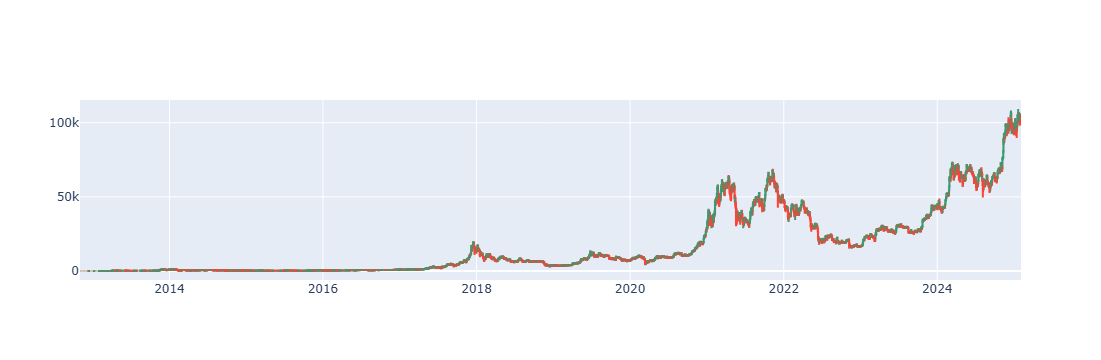

In [25]:
import plotly.graph_objects as go 

# 1. Load Data (Make sure file path is correct)
data01 = pd.read_csv(r"E:\COLLEGEPROJECT\College Project\BitcoinHistoricalData.csv")  # Or pd.read_excel, etc.

# 2. Inspect Raw Data (CRITICAL for debugging)
print("Raw Data (First 5 rows):")
print(data01.head())
print("\nRaw Data Types:")
print(data01.dtypes)
print("\nRaw Data Info:")  # Check for nulls and data types in detail
print(data01.info())

# 3. Forward-fill missing values
data01.ffill(inplace=True)  

# 4. Convert Date Column
data01['Date'] = pd.to_datetime(data01['Date'], errors='coerce')

# 5. Numeric Conversion (Fix object dtype issue)
cols_to_convert = ['Open', 'High', 'Low', 'Price']
for col in cols_to_convert:
    # A. Remove commas, currency symbols, whitespace, etc.
    data01[col] = data01[col].astype(str).str.replace(r'[^\d.]', '', regex=True).str.strip()
    # B. Convert to numeric
    data01[col] = pd.to_numeric(data01[col], errors='coerce')

# 6. Inspect Data After Cleaning
print("\nData After Cleaning (First 5 rows):")
print(data01.head())
print("\nData Types After Cleaning:")
print(data01.dtypes)
print("\nNaN counts after cleaning:")
print(data01.isnull().sum())

# 7. Check for Empty DataFrame After Cleaning
if data01.empty:
    print("ERROR: DataFrame is empty after cleaning. Check your data!")
    raise SystemExit

# 8. Drop rows with NaNs in essential columns
data01.dropna(subset=cols_to_convert + ['Date'], inplace=True)

# 9. Check for Empty DataFrame After Dropping NaNs
if data01.empty:
    print("ERROR: DataFrame is empty after dropping NaNs. Check your data!")
    raise SystemExit

# 10. Plotting
fig = go.Figure(data=[go.Candlestick(x=data01['Date'],
                                     open=data01['Open'],
                                     high=data01['High'],
                                     low=data01['Low'],
                                     close=data01['Price'])])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()


In [26]:
data01.head

<bound method NDFrame.head of            Date     Price      Open      High       Low    Vol. Change %
0    2025-02-02   99304.3  100647.1  101451.0   99081.8  61.33K   -1.34%
1    2025-02-01  100648.0  102421.3  102770.8  100293.5  47.48K   -1.73%
2    2025-01-31  102424.2  104726.9  105876.3  101576.0  82.79K   -2.20%
3    2025-01-30  104726.9  103723.0  106409.1  103388.4  74.84K    0.97%
4    2025-01-29  103722.0  101342.1  104760.0  101340.6  74.38K    2.34%
...         ...       ...       ...       ...       ...     ...      ...
4471 2012-11-06      10.9      10.8      10.9      10.7  27.00K    1.40%
4472 2012-11-05      10.8      10.8      10.9      10.6  21.78K   -0.46%
4473 2012-11-04      10.8      10.6      10.9      10.5  16.75K    1.50%
4474 2012-11-03      10.6      10.5      10.6      10.4  16.73K    1.62%
4475 2012-11-02      10.5      10.6      10.8      10.3  24.49K   -0.95%

[4476 rows x 7 columns]>

In [27]:
data01.tail

<bound method NDFrame.tail of            Date     Price      Open      High       Low    Vol. Change %
0    2025-02-02   99304.3  100647.1  101451.0   99081.8  61.33K   -1.34%
1    2025-02-01  100648.0  102421.3  102770.8  100293.5  47.48K   -1.73%
2    2025-01-31  102424.2  104726.9  105876.3  101576.0  82.79K   -2.20%
3    2025-01-30  104726.9  103723.0  106409.1  103388.4  74.84K    0.97%
4    2025-01-29  103722.0  101342.1  104760.0  101340.6  74.38K    2.34%
...         ...       ...       ...       ...       ...     ...      ...
4471 2012-11-06      10.9      10.8      10.9      10.7  27.00K    1.40%
4472 2012-11-05      10.8      10.8      10.9      10.6  21.78K   -0.46%
4473 2012-11-04      10.8      10.6      10.9      10.5  16.75K    1.50%
4474 2012-11-03      10.6      10.5      10.6      10.4  16.73K    1.62%
4475 2012-11-02      10.5      10.6      10.8      10.3  24.49K   -0.95%

[4476 rows x 7 columns]>

In [28]:
data02 = data01.drop(['Date','Change %'], axis = 1)

In [29]:
data01.head()

Date     Price      Open      High       Low    Vol. Change %
0 2025-02-02   99304.3  100647.1  101451.0   99081.8  61.33K   -1.34%
1 2025-02-01  100648.0  102421.3  102770.8  100293.5  47.48K   -1.73%
2 2025-01-31  102424.2  104726.9  105876.3  101576.0  82.79K   -2.20%
3 2025-01-30  104726.9  103723.0  106409.1  103388.4  74.84K    0.97%
4 2025-01-29  103722.0  101342.1  104760.0  101340.6  74.38K    2.34%

In [30]:
data02.head()

Price      Open      High       Low    Vol.
0   99304.3  100647.1  101451.0   99081.8  61.33K
1  100648.0  102421.3  102770.8  100293.5  47.48K
2  102424.2  104726.9  105876.3  101576.0  82.79K
3  104726.9  103723.0  106409.1  103388.4  74.84K
4  103722.0  101342.1  104760.0  101340.6  74.38K

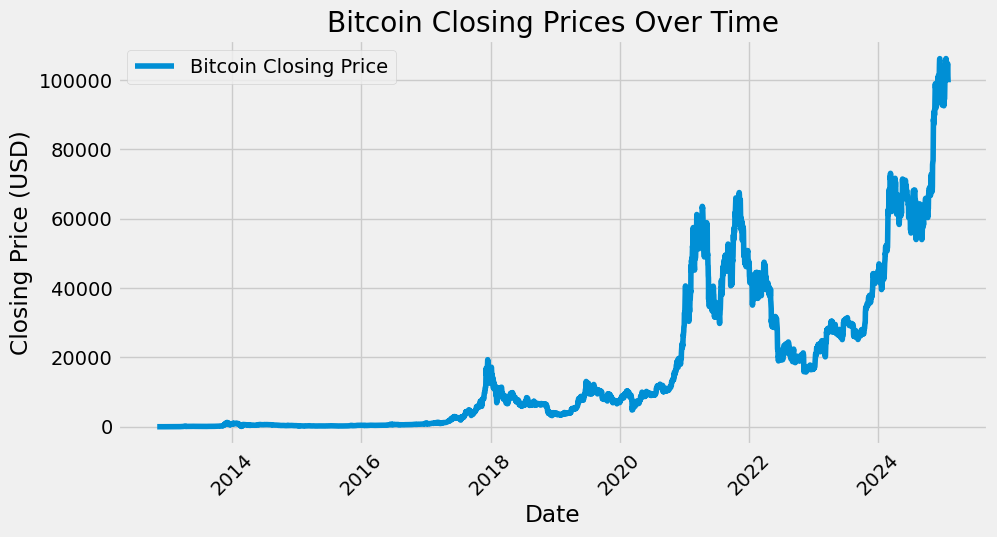

In [31]:
plt.figure(figsize=(10,5))
plt.plot(data01['Date'], data01['Price'], label="Bitcoin Closing Price")
plt.xlabel("Date")  
plt.ylabel("Closing Price (USD)")  
plt.title("Bitcoin Closing Prices Over Time")  
plt.legend()
plt.xticks(rotation=45)  # Rotates dates for better readability
plt.show()

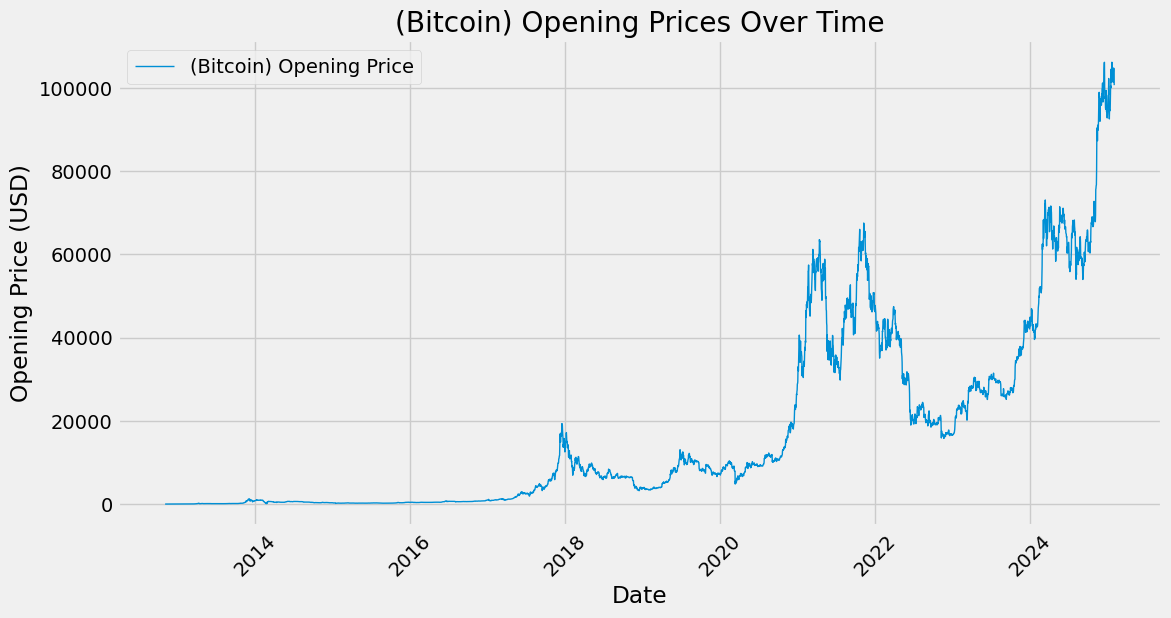

In [32]:
plt.figure(figsize=(12, 6))

# Use 'Date' for the X-axis instead of row index
plt.plot(data01['Date'], data01['Open'], label="(Bitcoin) Opening Price", linewidth=1)

plt.title("(Bitcoin) Opening Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Opening Price (USD)")
plt.legend()

# Rotate dates for better readability
plt.xticks(rotation=45)  

plt.show()


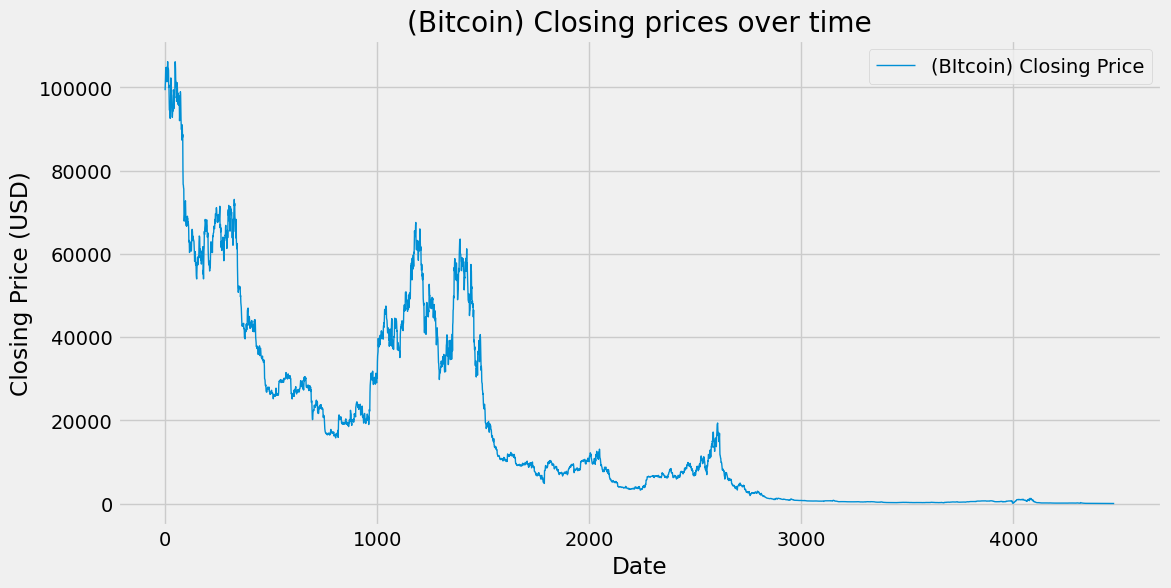

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(data01['Price'], label=f'(BItcoin) Closing Price', linewidth=1)

plt.title(f'(Bitcoin) Closing prices over time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [34]:
print(data01.head(10))
print(data01['Vol.'].describe())


        Date     Price      Open      High       Low     Vol. Change %
0 2025-02-02   99304.3  100647.1  101451.0   99081.8   61.33K   -1.34%
1 2025-02-01  100648.0  102421.3  102770.8  100293.5   47.48K   -1.73%
2 2025-01-31  102424.2  104726.9  105876.3  101576.0   82.79K   -2.20%
3 2025-01-30  104726.9  103723.0  106409.1  103388.4   74.84K    0.97%
4 2025-01-29  103722.0  101342.1  104760.0  101340.6   74.38K    2.34%
5 2025-01-28  101349.3  102085.2  103584.1  100288.0   74.69K   -0.73%
6 2025-01-27  102091.7  102618.3  103234.8   97987.5  146.38K   -0.53%
7 2025-01-26  102637.8  104743.8  105399.8  102543.8   32.18K   -2.01%
8 2025-01-25  104742.9  104861.4  105255.6  104133.9   37.68K   -0.11%
9 2025-01-24  104862.3  103913.6  107102.2  102760.0   83.96K    0.91%
count      4476
unique     4073
top       1.05M
freq          6
Name: Vol., dtype: object


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10288\3423526195.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



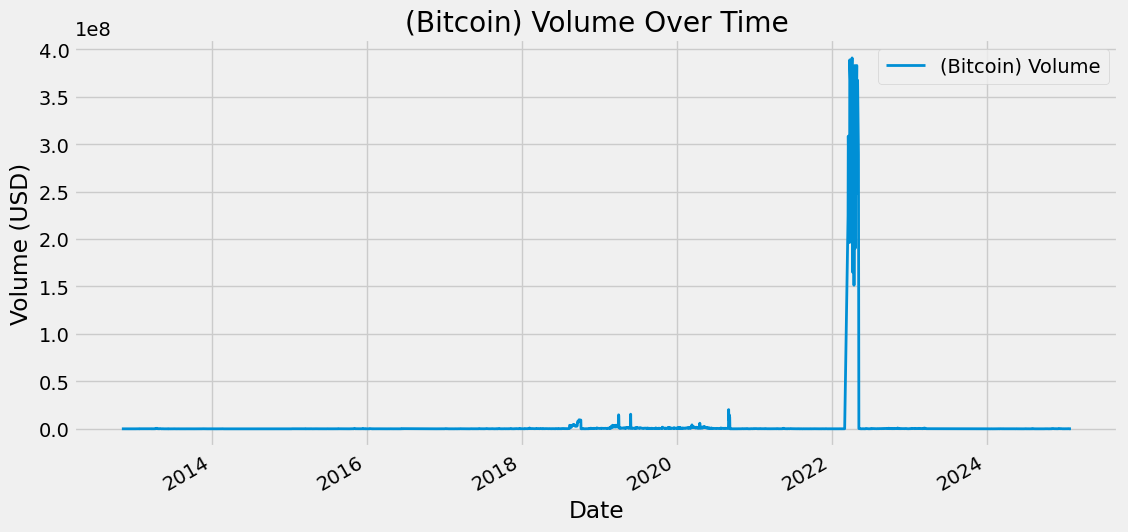

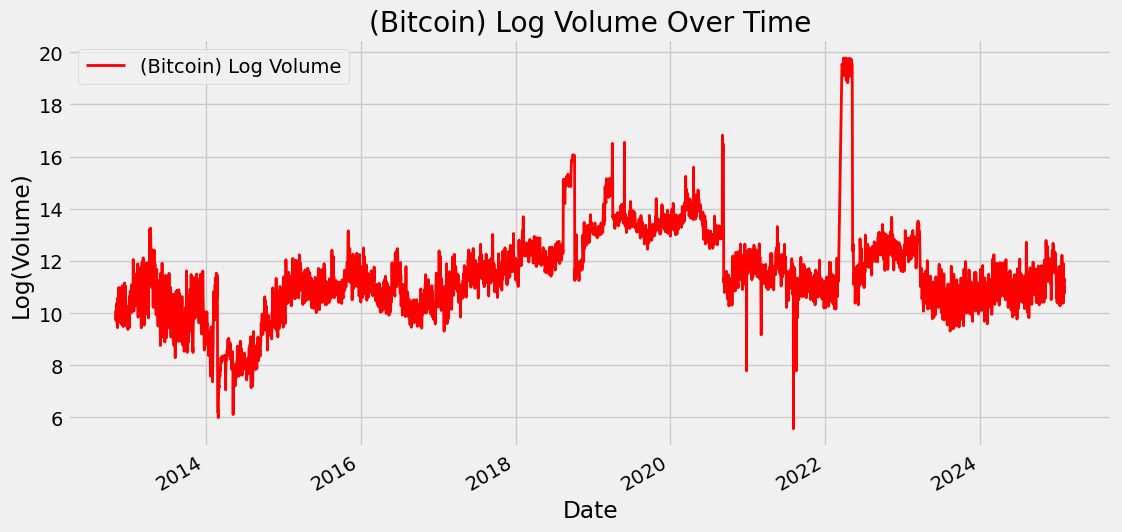

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data
data01 = pd.read_csv(r"E:\COLLEGEPROJECT\College Project\BitcoinHistoricalData.csv")

# Function to convert values like "61.33K" to 61330
def convert_volume(value):
    if isinstance(value, str):  # Check if value is a string before replacing
        value = value.replace(',', '')  # Remove commas if any
        
        if 'K' in value:
            return float(value.replace('K', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1_000_000_000
        elif value.strip() == '-':  # Handle missing or invalid values
            return None
        return float(value)  # Convert to float if no K, M, or B
    return value  # If already numeric, return as is

# Apply the conversion to the 'Vol.' column
data01['Vol.'] = data01['Vol.'].apply(convert_volume)

# Convert 'Date' to datetime
data01['Date'] = pd.to_datetime(data01['Date'], errors='coerce')

# Handle Missing Data
data01.dropna(subset=['Vol.', 'Date'], inplace=True)  # Drop NaN values

# **Fix Scaling Issue** - Remove extremely large outliers
upper_limit = data01['Vol.'].quantile(0.99)  # 99th percentile
data_filtered = data01[data01['Vol.'] < upper_limit]  # Filter out top 1% outliers

# **Log Transformation for Better Scaling (Optional)**
data_filtered['Log_Vol'] = np.log1p(data_filtered['Vol.'])  # log1p prevents log(0) errors

# Plot without outliers
plt.figure(figsize=(12, 6))
plt.plot(data_filtered['Date'], data_filtered['Vol.'], label='(Bitcoin) Volume', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('(Bitcoin) Volume Over Time')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

# Plot Log-Transformed Volume for Better Visibility
plt.figure(figsize=(12, 6))
plt.plot(data_filtered['Date'], data_filtered['Log_Vol'], label='(Bitcoin) Log Volume', linewidth=2, color='red')
plt.xlabel('Date')
plt.ylabel('Log(Volume)')
plt.title('(Bitcoin) Log Volume Over Time')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()


### We can determine the next day Bitcoin Stock price prediction using moving averages 

In [36]:
import pandas as pd

# Load Data
data01 = pd.read_csv(r"E:\COLLEGEPROJECT\College Project\BitcoinHistoricalData.csv")

# 1. Inspect Raw Data (Crucial for debugging)
print("Raw Data (First 5 rows):\n", data01.head())
print("\nRaw Data Types:\n", data01.dtypes)

# 2. Numeric Conversion (Correctly handle commas)
cols_to_convert = ['Open', 'High', 'Low', 'Price']  # Add other relevant columns
for col in cols_to_convert:
    # A. Remove commas (and other non-numeric characters if needed)
    data01[col] = data01[col].astype(str).str.replace(',', '', regex=False)  # Remove commas
    # B. Convert to numeric (errors='coerce' is essential)
    data01[col] = pd.to_numeric(data01[col], errors='coerce')

# 3. Inspect Data *After* Cleaning (Key step)
print("\nData After Cleaning (First 5 rows):\n", data01.head())
print("\nData Types After Cleaning:\n", data01.dtypes)
print("\nNaN counts after cleaning:\n", data01.isnull().sum())

# 4. Handle Missing Data (Important!)
data01.dropna(subset=cols_to_convert, inplace=True)  # Drop rows with NaNs in price columns



Raw Data (First 5 rows):
          Date      Price       Open       High        Low    Vol. Change %
0  02/02/2025   99,304.3  100,647.1  101,451.0   99,081.8  61.33K   -1.34%
1  02/01/2025  100,648.0  102,421.3  102,770.8  100,293.5  47.48K   -1.73%
2  01/31/2025  102,424.2  104,726.9  105,876.3  101,576.0  82.79K   -2.20%
3  01/30/2025  104,726.9  103,723.0  106,409.1  103,388.4  74.84K    0.97%
4  01/29/2025  103,722.0  101,342.1  104,760.0  101,340.6  74.38K    2.34%

Raw Data Types:
 Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

Data After Cleaning (First 5 rows):
          Date     Price      Open      High       Low    Vol. Change %
0  02/02/2025   99304.3  100647.1  101451.0   99081.8  61.33K   -1.34%
1  02/01/2025  100648.0  102421.3  102770.8  100293.5  47.48K   -1.73%
2  01/31/2025  102424.2  104726.9  105876.3  101576.0  82.79K   -2.20%
3  01/30/2025  104726.9  103723.0  10

In [37]:
# 5. Calculate Moving Average (Now it should work)
ma100 = data01.Open.rolling(100).mean()


In [38]:
ma100

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
4471    14.652
4472    14.508
4473    14.368
4474    14.233
4475    14.103
Name: Open, Length: 4476, dtype: float64

In [39]:
# 6. Calculate Moving Average (Now it should work)
ma200 = data01.Price.rolling(200).mean()

In [40]:
ma200

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
4471    52.0805
4472    51.4690
4473    50.8915
4474    50.3255
4475    49.7635
Name: Price, Length: 4476, dtype: float64

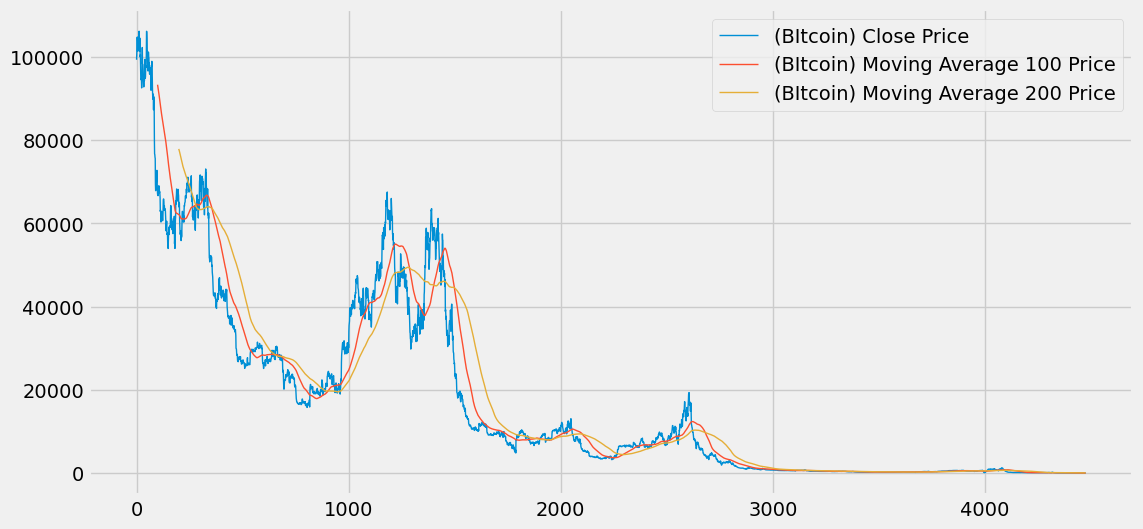

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(data01['Price'], label=f'(BItcoin) Close Price', linewidth=1)
plt.plot(ma100, label=f'(BItcoin) Moving Average 100 Price', linewidth=1)
plt.plot(ma200, label=f'(BItcoin) Moving Average 200 Price', linewidth=1)
plt.legend()

plt.show()   

### Predicting the next 30 days Stocks

In [42]:
ema100 = data01.Price.ewm(span=100 ,adjust = False).mean()  #used to calculate the exponentail moving average


In [43]:
ema200 = data01['Price'].ewm(span=200 ,adjust = False).mean()  


In [44]:
# Load Data
data01 = pd.read_csv(r"E:\COLLEGEPROJECT\College Project\BitcoinHistoricalData.csv")

# 1. Inspect Raw Data (Crucial!)
print("Raw Data (First 5 rows):\n", data01.head())
print("\nRaw Data Types:\n", data01.dtypes)

# 2. Data Cleaning and Numeric Conversion (Robust Approach)
cols_to_convert = ['Open', 'High', 'Low', 'Price']  # Add other relevant columns
for col in cols_to_convert:
    # A. Convert to String (Important for cleaning)
    data01[col] = data01[col].astype(str)

    # B. Remove commas, spaces, and other non-numeric characters
    data01[col] = data01[col].str.replace(r'[^\d.]', '', regex=True).str.strip() # Keep only digits and decimal

    # C. Convert to Numeric (errors='coerce' is essential)
    data01[col] = pd.to_numeric(data01[col], errors='coerce')

# 3. Inspect Data *After* Cleaning (Key step)
print("\nData After Cleaning (First 5 rows):\n", data01.head())
print("\nData Types After Cleaning:\n", data01.dtypes)
print("\nNaN counts after cleaning:\n", data01.isnull().sum())

# 4. Handle Missing Data (Important!)
data01.dropna(subset=cols_to_convert, inplace=True)  # Drop rows with NaNs

# 5. Calculate Percentage Change (Now it should work)
percentage_changes = data01[cols_to_convert].pct_change()

# ... (Rest of your code)

Raw Data (First 5 rows):
          Date      Price       Open       High        Low    Vol. Change %
0  02/02/2025   99,304.3  100,647.1  101,451.0   99,081.8  61.33K   -1.34%
1  02/01/2025  100,648.0  102,421.3  102,770.8  100,293.5  47.48K   -1.73%
2  01/31/2025  102,424.2  104,726.9  105,876.3  101,576.0  82.79K   -2.20%
3  01/30/2025  104,726.9  103,723.0  106,409.1  103,388.4  74.84K    0.97%
4  01/29/2025  103,722.0  101,342.1  104,760.0  101,340.6  74.38K    2.34%

Raw Data Types:
 Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

Data After Cleaning (First 5 rows):
          Date     Price      Open      High       Low    Vol. Change %
0  02/02/2025   99304.3  100647.1  101451.0   99081.8  61.33K   -1.34%
1  02/01/2025  100648.0  102421.3  102770.8  100293.5  47.48K   -1.73%
2  01/31/2025  102424.2  104726.9  105876.3  101576.0  82.79K   -2.20%
3  01/30/2025  104726.9  103723.0  10

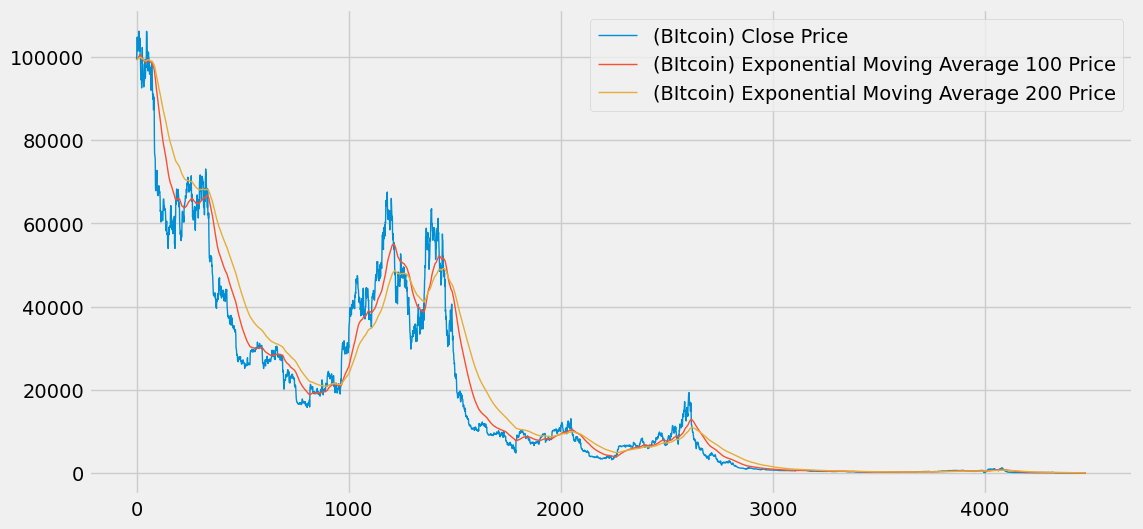

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(data01['Price'], label=f'(BItcoin) Close Price', linewidth=1)
plt.plot(ema100, label=f'(BItcoin) Exponential Moving Average 100 Price', linewidth=1)
plt.plot(ema200, label=f'(BItcoin) Exponential Moving Average 200 Price', linewidth=1)
plt.legend()
plt.show()

### LSTM OVER RNN USING Training And Testing

In [46]:
data_training = pd.DataFrame(data01['Price'][0:int(len(data01)*0.70)])
data_testing = pd.DataFrame(data01['Price'][0:int(len(data01)*0.70): int(len(data01))])

In [47]:
data_training.shape

(3133, 1)

In [48]:
data_testing.shape

(1, 1)

In [49]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))


In [51]:
data_training_array = scaler.fit_transform(data_training)
# Keeps essential info succinct: removes "This is used to" (implied by code), simplifies to "scales all values to a 0-1 range", uses present tense "scales", keeps single-line clarity

In [52]:
data_training_array.shape

(3133, 1)

In [53]:
data_training_array

array([[0.93513202],
       [0.94785118],
       [0.96466428],
       ...,
       [0.00131006],
       [0.00141419],
       [0.00115388]])

In [54]:
data_training_array.shape[0]

3133

In [55]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
        x_train.append(data_training_array[i-100:i])
        y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train) ,np.array(y_train)

In [56]:
x_train.shape

(3033, 100, 1)

In [57]:
y_train.shape

(3033,)

### Building the Model: A Step-by-Step Approach

pip install tensorflow

### Model Architecture Setup

In [58]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D 
2D ->(batch_size, units)
3D ->(batch_size, time_steps, units)


#### LSTM Model Architecture and Summary

In [59]:
from keras import Input

model = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(units=50, activation="relu", return_sequences=True),
    Dropout(0.2),

    LSTM(units=60, activation="relu", return_sequences=True),
    Dropout(0.3),

    LSTM(units=80, activation="relu", return_sequences=True),
    Dropout(0.4),

    LSTM(units=120, activation="relu"),
    Dropout(0.5),

    Dense(units=1)
])


In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - loss: 0.0263
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - loss: 0.0036
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - loss: 0.0029
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - loss: 0.0027
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - loss: 0.0024
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - loss: 0.0023
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - loss: 0.0028
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - loss: 0.0023
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - loss: 0.0019
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - loss: 0.0021
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - loss: 0.0018
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - loss: 0.0019
Epoch 13/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - loss: 0.0019
Epoch 14/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - loss: 0.0016
Epoch 15/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 16s 

In [65]:
past_100_days = data_training.tail(25000)

In [66]:
past_100_days.shape

(3133, 1)

In [67]:
import pandas as pd

final_dataset = pd.concat([past_100_days, data_testing], ignore_index=True)


In [68]:
input_data = scaler.fit_transform(final_dataset)

In [69]:
final_dataset.head()

Price
0   99304.3
1  100648.0
2  102424.2
3  104726.9
4  103722.0

In [70]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])  # NumPy slicing
    y_test.append(input_data[i, 0])  # NumPy row selection

x_test, y_test = np.array(x_test), np.array(y_test)  # Convert lists to NumPy arrays


In [71]:
x_test.shape

(3034, 100, 1)

In [72]:
final_dataset.head()

Price
0   99304.3
1  100648.0
2  102424.2
3  104726.9
4  103722.0

In [73]:
y_predicted = model.predict(x_test)


95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step


In [74]:
y_predicted.shape

(3034, 1)

In [75]:
scaler.scale_

array([9.46577083e-06])

In [76]:
scaler_factor = 1 / 9.46577083e-06
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor


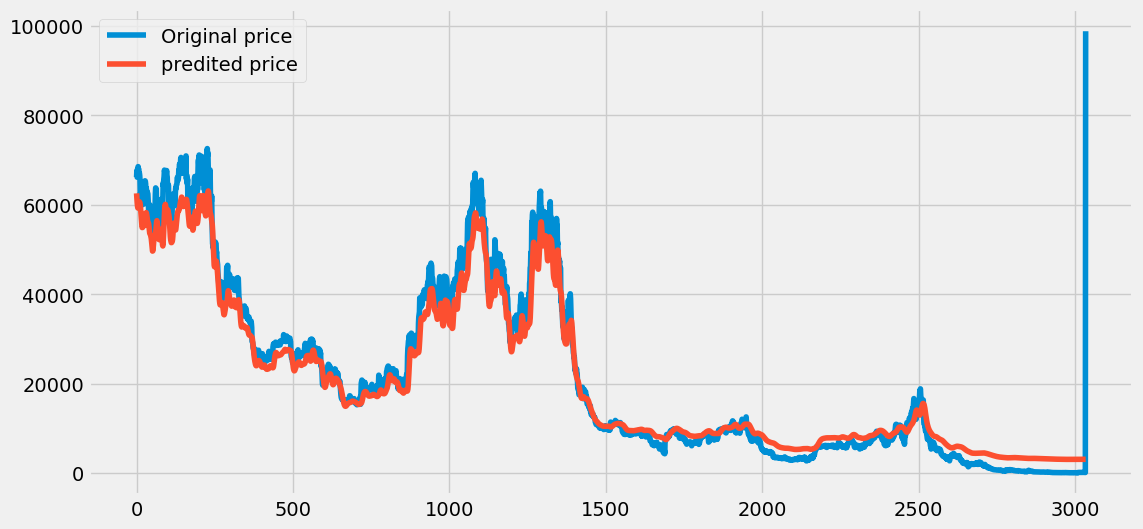

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original price')
plt.plot(y_predicted, label = 'predited price')
plt.legend()
plt.show()

In [79]:
model.save("stock_dl_model.keras")